<a href="https://colab.research.google.com/github/GodingWal/Tesla-Stock-Forecast/blob/master/Time_Series_Tesla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%%capture
import sys

if 'google.colab' in sys.modules:
    # Install packages in Colab
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*
    !pip install pyramid-arima
    !pip install stepwise
    !pip install pmdarima

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from pandas import read_csv
from matplotlib import pyplot
from sklearn.pipeline import make_pipeline
import category_encoders as ce
from sklearn.metrics import accuracy_score
import numpy as np
from statsmodels.tsa.stattools import adfuller
from sklearn.impute import SimpleImputer
sns.set()
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from scipy.optimize import minimize
import statsmodels.tsa.api as smt
import statsmodels.api as sm
from tqdm import tqdm_notebook
from itertools import product
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.arima_model import ARIMA
import datetime
from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.tsa.stattools as ts
import statistics
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Tesla.csv - Tesla.csv.csv to Tesla.csv - Tesla.csv (1).csv


In [0]:
tesla = 'Tesla.csv - Tesla.csv.csv'
df = pd.read_csv(tesla)

In [0]:
df = df.drop(['High', 'Low', 'Close', 'Volume', 'Adj Close'], axis=1) #These are redundant

In [6]:
df.head()

,Date,Open
0,6/29/2010,19.000000
1,6/30/2010,25.790001
2,7/1/2010,25.000000
3,7/2/2010,23.000000
4,7/6/2010,20.000000


In [0]:
# Set Date as index
df['Date_Time'] = pd.to_datetime(df['Date'])
df = df.set_index('Date_Time')
df.drop(['Date'], axis=1, inplace=True)

***SMAPE of mean as guess***

In [0]:
m = df['Open']

In [0]:
majority = m.mode()[0]
pred = [majority]*len(m)

In [10]:
from pmdarima.metrics import smape as sm

sm(df['Open'], pred)

93.29499706084842

ADF Test, Not Stationary

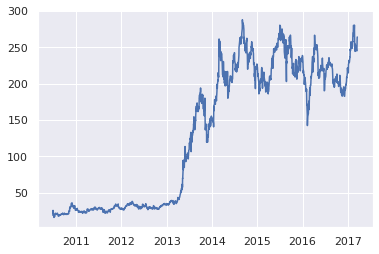

In [11]:
pyplot.plot(df);

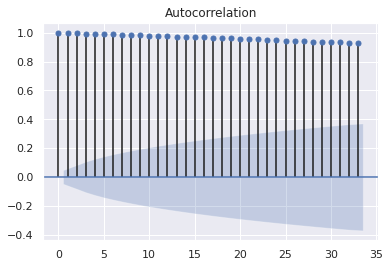

In [12]:
plot_acf(df['Open'])
pyplot.show()

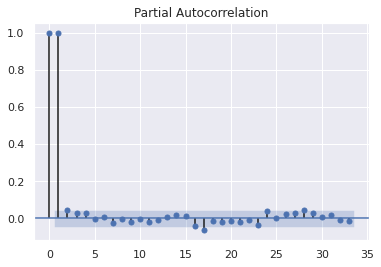

In [13]:
plot_pacf(df['Open'])
pyplot.show()

ADF on data 

In [14]:
X = df['Open']
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.818193
p-value: 0.813720
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


Make into Stationary, Differencing Data

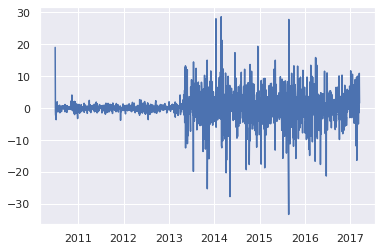

In [15]:
df_diff1 = df.diff().fillna(df)
pyplot.plot(df_diff1);

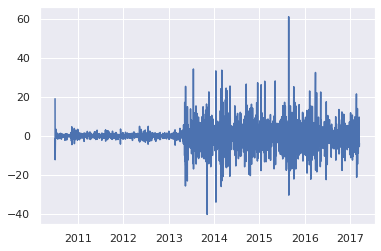

In [16]:
df_diff2 = df_diff1.diff().fillna(df_diff1)
pyplot.plot(df_diff2)

ADF test on data after difference

In [17]:
X = df_diff2
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -15.951842
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


ACF and PACF plot

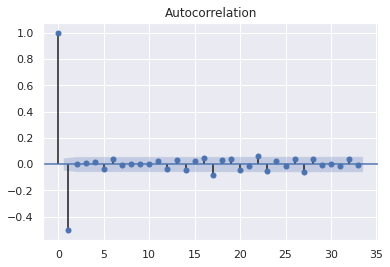

In [18]:
plot_acf(df_diff2)
pyplot.show()

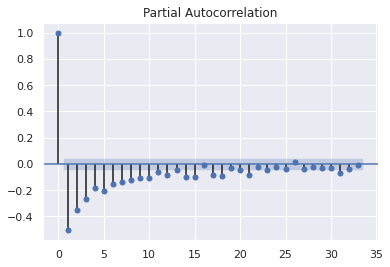

In [19]:
plot_pacf(df_diff2)
pyplot.show()

Train/Test Split

In [20]:
df_diff2.head()

,Open
Date_Time,
2010-06-29,19.000000
2010-06-30,-12.209999
2010-07-01,-7.580002
2010-07-02,-1.209999
2010-07-06,-1.000000


In [0]:
cutoff = pd.to_datetime('2015-10-01')

In [0]:
train = df_diff2[df_diff2.index < cutoff]
test = df_diff2[df_diff2.index > cutoff]

Model 1

In [24]:
from pyramid.arima import auto_arima
stepwise_arima = auto_arima(train['Open'], start_p=2, start_q=2, max_d=5,
                           max_p=16, max_q=5, m=12, scoring='mse',
                           start_P=2, max_order=20, random_state=78, seasonal=False,
                           d=1, D=1, trace=True, information_criterion='aic',
                           error_action='ignore', stationary=True, 
                           suppress_warnings=True, with_intercept=False,
                           stepwise=True, maxiter=100, n_jobs=24, n_fits=20)

Fit ARIMA: order=(2, 0, 2); AIC=7743.661, BIC=7774.792, Fit time=1.068 seconds
Fit ARIMA: order=(0, 0, 0); AIC=8710.772, BIC=8721.149, Fit time=0.003 seconds
Fit ARIMA: order=(1, 0, 0); AIC=8333.875, BIC=8349.440, Fit time=0.024 seconds
Fit ARIMA: order=(0, 0, 1); AIC=7745.076, BIC=7760.641, Fit time=0.141 seconds
Fit ARIMA: order=(1, 0, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 2); AIC=7745.642, BIC=7781.961, Fit time=1.585 seconds
Fit ARIMA: order=(2, 0, 1); AIC=7743.074, BIC=7769.016, Fit time=0.750 seconds
Fit ARIMA: order=(1, 0, 1); AIC=7744.581, BIC=7765.334, Fit time=0.546 seconds
Fit ARIMA: order=(3, 0, 1); AIC=7744.254, BIC=7775.385, Fit time=1.011 seconds
Fit ARIMA: order=(2, 0, 0); AIC=8159.908, BIC=8180.661, Fit time=0.062 seconds
Total fit time: 5.277 seconds


In [25]:
stepwise_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1324
Model:                     ARMA(2, 1)   Log Likelihood               -3866.537
Method:                       css-mle   S.D. of innovations              4.476
Date:                Fri, 29 May 2020   AIC                           7743.074
Time:                        14:11:57   BIC                           7769.016
Sample:                             0   HQIC                          7752.799
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.000      0.423      0.672      -0.000       0.001
ar.L1.y       -0.0457      0.027     -1.665      0.096      -0.099       0.008
ar.L2.y       -0.0518      0.028     -1.874      0.061      -0.106       0.002
ma.L1.y       -0.9999      0.002   -427.910      0.000      -1.005      -0.995
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.4410           -4.3712j            4.3934           -0.2660
AR.2           -0.4410           +4.3712j            4.3934            0.2660
MA.1            1.0001           +0.0000j            1.0001            0.0000
-----------------------------------------------------------------------------
"""

In [0]:
walk_forward, walk_forward_conf_int = stepwise_arima.predict(n_periods=367, return_conf_int=True)

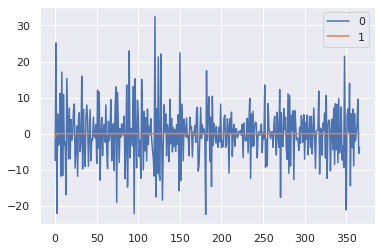

In [27]:
dd = pd.DataFrame(pd.np.column_stack([test[:367], walk_forward])).plot()

SMAPE for 1st model

In [28]:
from pmdarima.metrics import smape as sm

sm(test[:367], walk_forward[:367])

199.83938279228218

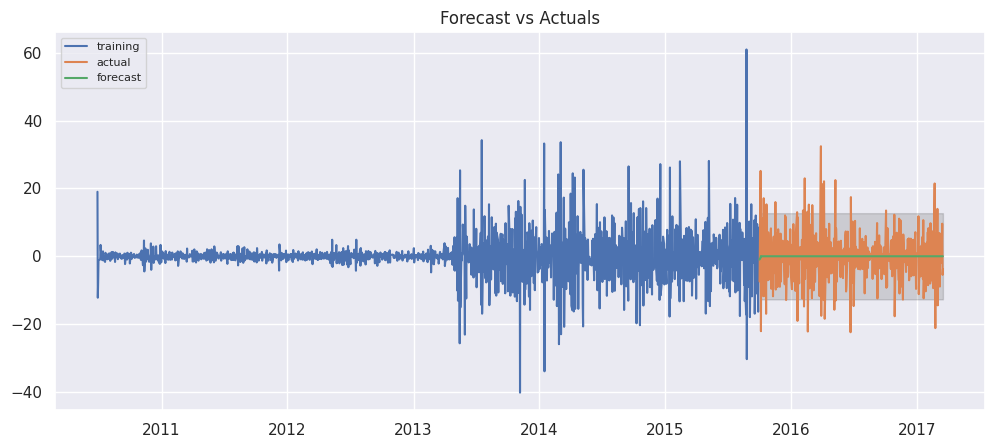

In [29]:
# Make as pandas series
fc_series = pd.Series(walk_forward, index=test.index)
lower_series = pd.Series(walk_forward_conf_int[:, 0], index=test.index)
upper_series = pd.Series(walk_forward_conf_int[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [0]:
train_3 = df[df.index < cutoff]
test_3 = df[df.index > cutoff]

Best Model

Performing stepwise search to minimize aic
Fit ARIMA(2,1,2)x(1,0,1,12) [intercept=True]; AIC=7717.556, BIC=7759.058, Time=2.724 seconds
Fit ARIMA(0,1,0)x(0,0,0,12) [intercept=True]; AIC=7713.487, BIC=7723.862, Time=0.052 seconds
Fit ARIMA(1,1,0)x(1,0,0,12) [intercept=True]; AIC=7714.264, BIC=7735.015, Time=1.073 seconds
Fit ARIMA(0,1,1)x(0,0,1,12) [intercept=True]; AIC=7713.892, BIC=7734.643, Time=1.164 seconds
Fit ARIMA(0,1,0)x(0,0,0,12) [intercept=False]; AIC=7713.550, BIC=7718.738, Time=0.043 seconds
Fit ARIMA(0,1,0)x(1,0,0,12) [intercept=True]; AIC=7715.471, BIC=7731.034, Time=0.489 seconds
Fit ARIMA(0,1,0)x(0,0,1,12) [intercept=True]; AIC=7715.471, BIC=7731.034, Time=0.454 seconds
Fit ARIMA(0,1,0)x(1,0,1,12) [intercept=True]; AIC=7717.459, BIC=7738.209, Time=0.993 seconds
Fit ARIMA(1,1,0)x(0,0,0,12) [intercept=True]; AIC=7712.273, BIC=7727.836, Time=0.142 seconds
Fit ARIMA(1,1,0)x(0,0,1,12) [intercept=True]; AIC=7714.265, BIC=7735.015, Time=1.133 seconds
Fit ARIMA(1,1,0)x(1,0,1,12

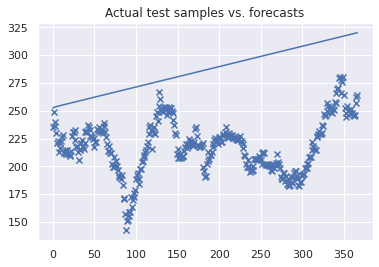

In [31]:

import pmdarima as pm
from pmdarima import model_selection
import numpy as np
from matplotlib import pyplot as plt

# Fit a simple auto_arima model
arima = pm.auto_arima(train_3, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=10,
                      seasonal=True, m=12)

# Plot actual test vs. forecasts:
x = np.arange(test_3.shape[0])
plt.scatter(x, test_3, marker='x')
plt.plot(x, arima.predict(n_periods=test_3.shape[0]))
plt.title('Actual test samples vs. forecasts')
plt.show()

SMAPE for best model

In [32]:
from pmdarima.metrics import smape as sm

sm(test_3[:367], arima.predict(n_periods=test_3.shape[0]))

27.333793191544178